In [1]:
import numpy as np
import pandas as pd
import gen_data
import regex as re
import seaborn as sns

t0_GDP = pd.read_csv('GDP_dat.csv').loc[:,['State','stateGDP_t0']]
t0_GDP.head()

,State,stateGDP_t0
0,California,3120386
1,Texas,1772132
2,New York,1705127
3,Florida,1111614
4,Illinois,875671


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
simDat = gen_data.sim_data(t0_GDP, **gen_data.sim_params)
treatment_years = simDat.loc[:,['State', 'treatment_year']]

In [4]:
treatment_years

,State,treatment_year
0,California,10
1,Texas,10
2,New York,10
3,Florida,10
4,Illinois,10
5,Pennsylvania,10
6,Ohio,10
7,Washington,10
8,Georgia,10
9,New Jersey,10


In [5]:
simLong = simDat.drop(columns = 'treatment_year').set_index('State').unstack().reset_index()
simLong = simLong[simLong['level_0'].apply(lambda x: bool(re.search('pct', x)))]

In [6]:
simLong = simDat.drop(columns = 'treatment_year').set_index('State').unstack().reset_index()
simLong = simLong[simLong['level_0'].apply(lambda x: bool(re.search('pct', x)))]
simLong[simLong['level_0'].apply(lambda x: bool(re.search('pct', x)))]
simLong.loc[:,'t'] = simLong.loc[:,'level_0'].apply(
    lambda x: int(re.findall('\d*$', x)[0]))
simLong = simLong.drop(columns = 'level_0').rename(columns = {0:'deltaGDP_pct'})
simLong

,State,deltaGDP_pct,t
100,California,0.019450,1
101,Texas,0.022012,1
102,New York,0.019961,1
103,Florida,0.020527,1
104,Illinois,0.018932,1
...,...,...,...
2045,North Dakota,0.024837,20
2046,Montana,0.025199,20
2047,Alaska,0.025831,20
2048,Wyoming,0.027119,20


<AxesSubplot:xlabel='t', ylabel='deltaGDP_pct'>

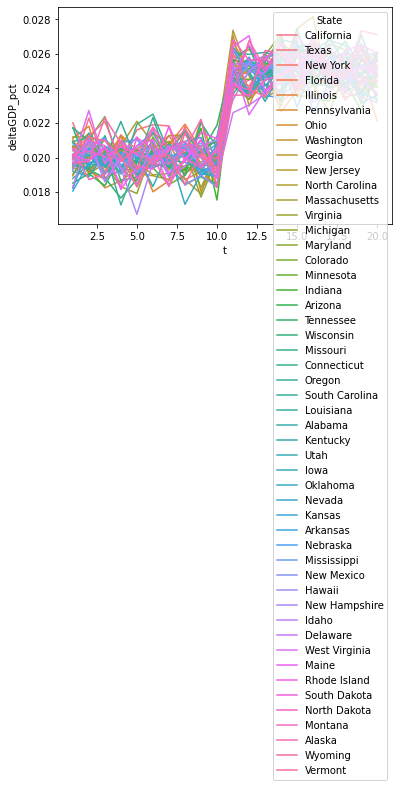

In [7]:
sns.lineplot(data= simLong, x = 't', y = 'deltaGDP_pct', hue = 'State')

In [17]:
simLong[['State', 't']].merge(treatment_years)

,State,t,treatment_year
0,California,1,10
1,California,2,10
2,California,3,10
3,California,4,10
4,California,5,10
...,...,...,...
995,Vermont,16,10
996,Vermont,17,10
997,Vermont,18,10
998,Vermont,19,10


In [18]:
import fit_model
data_proc, target, baseline = fit_model.preprocess_dat(data=simLong, treatment_years=treatment_years, target = 'deltaGDP_pct')

TypeError: preprocess_dat() got an unexpected keyword argument 'treatment_year'